In [3]:
from models.basic_CNN import basic_CNN
from utils import *
from tqdm import tqdm
from training import training
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torchtools.early_stopping'

In [2]:
train_data, test_data = get_data()
train_unlabeled_loader, train_labeled_loader, test_loader = get_loader(train_data, test_data, batch_size=50)

In [3]:
train_class = training(train_loader=train_labeled_loader, val_loader=test_loader)
model = basic_CNN()

 <function is_available at 0x000001F8BCBAB280> and can be used by 1 devices
The device used is NVIDIA GeForce GTX 1050


In [4]:
import torch.optim as optim
import torch.nn as nn


output_fn = torch.nn.Softmax(dim=1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [5]:
epochs = 10
train_class.train(model=model, epochs=epochs, optimizer=optimizer, criterion=criterion, output_fn=output_fn)

 10%|█         | 1/10 [00:18<02:48, 18.72s/it]

| Epoch: 1/10 | Train: Loss 3.5405 Accuracy : 0.1000 | Val: Loss 3.6512 Accuracy : 0.0983



 20%|██        | 2/10 [00:24<01:27, 10.95s/it]

| Epoch: 2/10 | Train: Loss 2.1673 Accuracy : 0.3600 | Val: Loss 2.2090 Accuracy : 0.2356



 30%|███       | 3/10 [00:29<00:58,  8.41s/it]

| Epoch: 3/10 | Train: Loss 1.2806 Accuracy : 0.7500 | Val: Loss 1.5906 Accuracy : 0.5508



 40%|████      | 4/10 [00:35<00:45,  7.54s/it]

| Epoch: 4/10 | Train: Loss 0.5607 Accuracy : 0.8200 | Val: Loss 1.1540 Accuracy : 0.6064



 50%|█████     | 5/10 [00:41<00:34,  6.93s/it]

| Epoch: 5/10 | Train: Loss 0.3100 Accuracy : 0.8600 | Val: Loss 1.2564 Accuracy : 0.6861



 60%|██████    | 6/10 [00:46<00:25,  6.36s/it]

| Epoch: 6/10 | Train: Loss 0.1630 Accuracy : 0.9500 | Val: Loss 1.3050 Accuracy : 0.7209



 70%|███████   | 7/10 [00:52<00:17,  6.00s/it]

| Epoch: 7/10 | Train: Loss 0.0864 Accuracy : 0.9700 | Val: Loss 1.3839 Accuracy : 0.7359



 80%|████████  | 8/10 [00:57<00:11,  5.74s/it]

| Epoch: 8/10 | Train: Loss 0.0251 Accuracy : 1.0000 | Val: Loss 1.6277 Accuracy : 0.7373



 90%|█████████ | 9/10 [01:02<00:05,  5.64s/it]

| Epoch: 9/10 | Train: Loss 0.0074 Accuracy : 1.0000 | Val: Loss 1.8344 Accuracy : 0.7499



100%|██████████| 10/10 [01:09<00:00,  6.91s/it]

| Epoch: 10/10 | Train: Loss 0.0067 Accuracy : 1.0000 | Val: Loss 2.2568 Accuracy : 0.7313



In [6]:
#PATH = './basic_model.pth'
#torch.save(model.state_dict(), PATH)

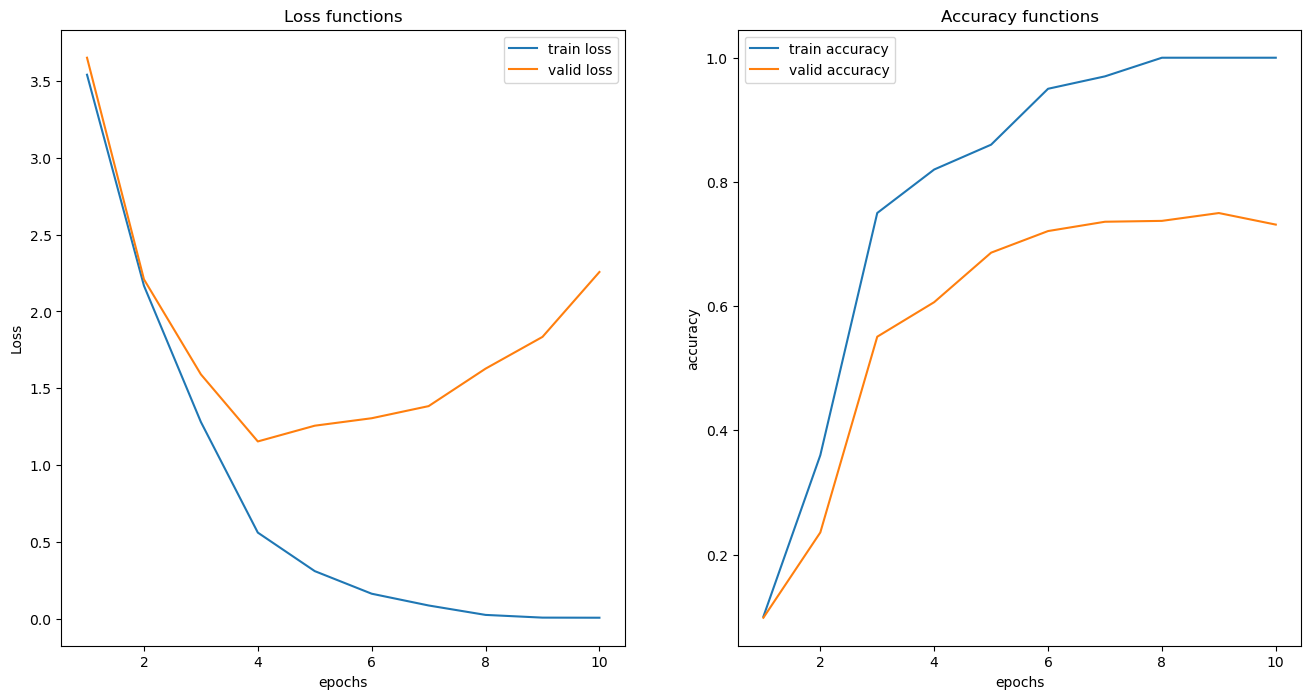

In [7]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(range(1,epochs + 1), train_class.loss_train, label="train loss" )
plt.plot(range(1, epochs +1), train_class.loss_valid, label="valid loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss functions")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,epochs + 1), train_class.acc_train, label="train accuracy" )
plt.plot(range(1, epochs +1), train_class.acc_valid, label="valid accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy functions")
plt.legend()

#plt.savefig("Metrics functins basic model.png")
plt.show()